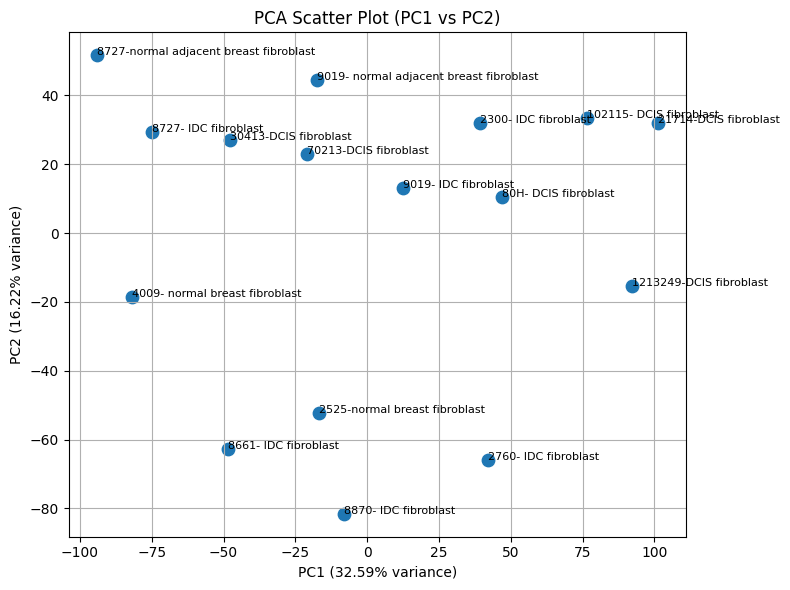

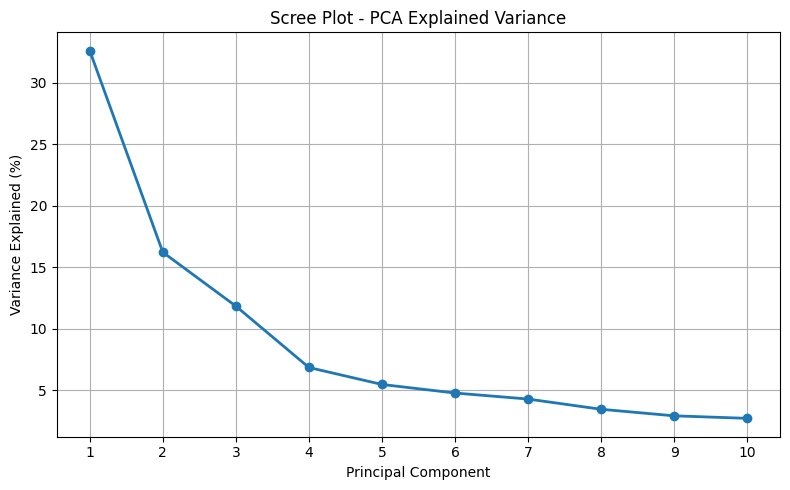

In [ ]:
# Re-import necessary libraries since the previous state was lost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Load data
file_path = "/content/GSE228582_Fibroblast_RNA_Seq_raw_counts.csv"
df = pd.read_csv(file_path, index_col=0)

# Step 2: Remove genes with all zeros
df = df.loc[~(df == 0).all(axis=1)]

# Step 3: Log2 transform the counts (+1 to avoid log(0))
df_log = np.log2(df + 1)

# Step 4: Transpose (so samples are rows and genes are columns)
df_T = df_log.T

# Fix column names to ensure all are strings
df_T.columns = df_T.columns.astype(str)

# Step 5: Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_T)

# Step 6: Run PCA
pca = PCA(n_components=10)
pca_result = pca.fit_transform(df_scaled)

# Step 7: PCA Scatter Plot (PC1 vs PC2)
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], s=80)
for i, sample in enumerate(df_T.index):
    plt.text(pca_result[i, 0], pca_result[i, 1], sample, fontsize=8)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")
plt.title("PCA Scatter Plot (PC1 vs PC2)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 8: Scree Plot (Explained Variance)
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_ * 100, 'o-', linewidth=2)
plt.title("Scree Plot - PCA Explained Variance")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained (%)")
plt.grid(True)
plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1))
plt.tight_layout()
plt.show()


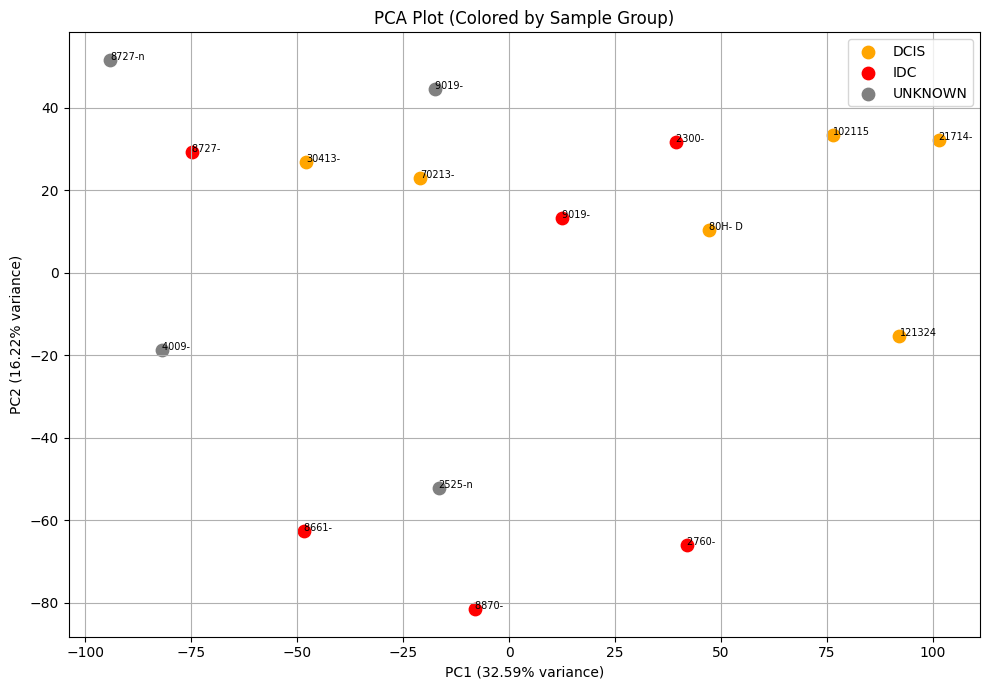

In [ ]:
# Ensure group labels are strings and fill missing with 'UNKNOWN'
group_labels = group_labels.fillna("UNKNOWN").astype(str).str.upper().values.flatten()

# PCA Scatter Plot
plt.figure(figsize=(10, 7))
colors = {"NORMAL": "green", "DCIS": "orange", "IDC": "red", "UNKNOWN": "gray"}

for group in np.unique(group_labels):
    idx = group_labels == group
    plt.scatter(pca_result[idx, 0], pca_result[idx, 1],
                c=colors.get(group, "gray"), label=group, s=80)

# Add sample text labels
for i, name in enumerate(sample_names):
    plt.text(pca_result[i, 0], pca_result[i, 1], name[:6], fontsize=7)

plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")
plt.title("PCA Plot (Colored by Sample Group)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
